<a href="https://colab.research.google.com/github/netoquimico/Pythonworks/blob/main/space_titanic_Kagle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [104]:
ST=pd.read_csv('/content/train st.csv')

# **DATA**

In [105]:
ST


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [106]:
ST.dtypes


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

# **STATISTICS**

In [107]:
ST.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: xlabel='Transported', ylabel='count'>

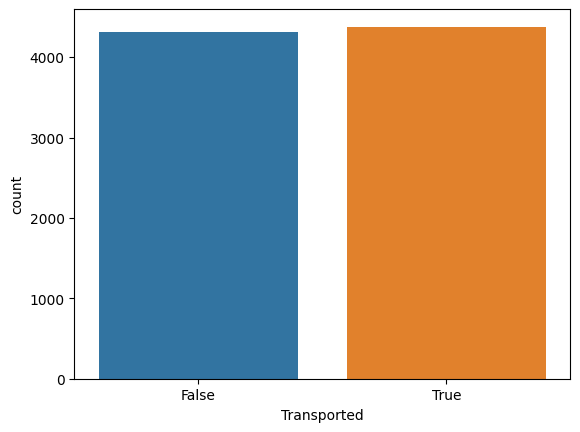

In [108]:
sns.countplot(x=ST['Transported'])

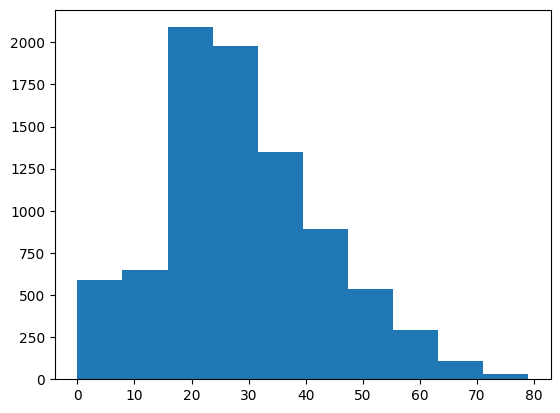

In [109]:
plt.hist(x = ST['Age']);

<ipython-input-110-69a9f4fccc41>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ST.corr(), annot=True)


<Axes: >

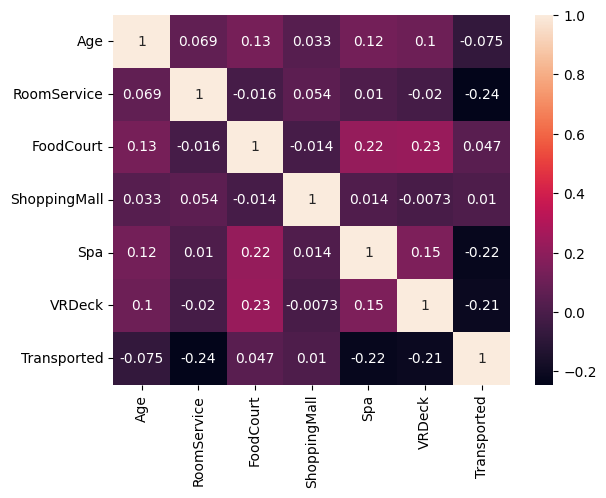

In [110]:
sns.heatmap(ST.corr(), annot=True)

<Axes: xlabel='HomePlanet', ylabel='count'>

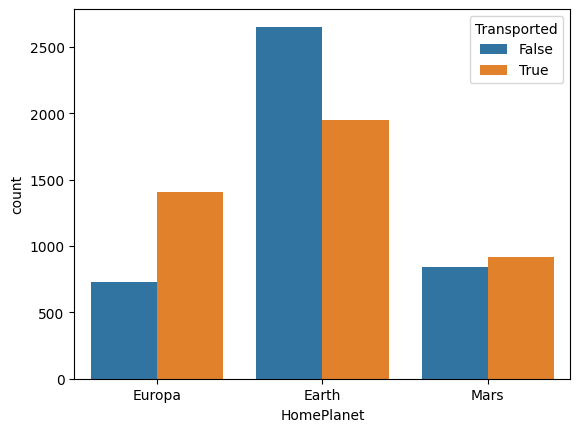

In [111]:
sns.countplot(data=ST, x='HomePlanet', hue='Transported')

**DATA TREATMENT**

In [112]:
ST = ST.drop('Name', axis=1)
ST = ST.drop('PassengerId', axis=1)
 #deleting the name and PassengerIF column because it has no influence on the data 

In [113]:
ST

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


For numerical variables we will use the mean to replace the missing values

In [114]:
ST['Age'].fillna(ST['Age'].mean(), inplace=True)
ST['RoomService'].fillna(ST['RoomService'].mean(), inplace=True)
ST['FoodCourt'].fillna(ST['FoodCourt'].mean(), inplace=True)
ST['ShoppingMall'].fillna(ST['ShoppingMall'].mean(), inplace=True)
ST['Spa'].fillna(ST['Spa'].mean(), inplace=True)
ST['VRDeck'].fillna(ST['VRDeck'].mean(), inplace=True)

In [115]:
ST.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

Categorigal data cleaning

In [116]:
ST['VIP'].unique()

array([False, True, nan], dtype=object)

In [117]:
ST['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [118]:
ST['Cabin'].nunique()

6560

In [119]:
ST['CryoSleep'].unique()

array([False, True, nan], dtype=object)

Because the column Cabin have many variables I will exclude the column.
The columns CryoSleep and VIP the data will be transformed for numerical data.

In [120]:
ST=ST.drop('Cabin', axis=1)


In [121]:
ST=ST.dropna() #removes all rows from the df dataframe that contain missing values (NaN - Not a Number).

In [122]:
ST.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [123]:
dmap={True:1, False:0}
ST['VIP']=ST['VIP'].map(dmap)
ST['CryoSleep']=ST['CryoSleep'].map(dmap)
ST['Transported']=ST['Transported'].map(dmap)

In [124]:
ST['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [125]:
from sklearn.preprocessing import LabelEncoder

# Criar uma instância do LabelEncoder
encoder = LabelEncoder()

# Ajustar e transformar os dados da coluna 'HomePlanet'
ST['HomePlanet'] = encoder.fit_transform(ST['HomePlanet'])
ST['Destination'] = encoder.fit_transform(ST['Destination'])

In [126]:
ST

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


# **Data Pre-processing**

Division between predictors and class

In [127]:
X_ST =ST.iloc[:,0:10].values

In [128]:
Y_ST =ST.iloc[:,10].values

Scaling of values

In [129]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_ST = scaler_census.fit_transform(X_ST)

In [130]:
X_ST

array([[ 0.42024649, -0.74821557,  0.63226738, ..., -0.2897589 ,
        -0.27748092, -0.26858756],
       [-0.83415203, -0.74821557,  0.63226738, ..., -0.24895239,
         0.20731535, -0.23018519],
       [ 0.42024649, -0.74821557,  0.63226738, ..., -0.2897589 ,
         5.65222206, -0.22582128],
       ...,
       [-0.83415203, -0.74821557,  0.63226738, ...,  2.76583261,
        -0.27659787, -0.26858756],
       [ 0.42024649, -0.74821557, -1.80116248, ..., -0.2897589 ,
         0.0342369 ,  2.55485988],
       [ 0.42024649, -0.74821557,  0.63226738, ..., -0.2897589 ,
        -0.27748092, -0.25811419]])

**LOGISTIC REGRESSION**

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
model_1= LogisticRegression()

In [133]:
model_1.fit(X_ST,Y_ST)

LogisticRegression()

**WORKING WITH TEST SHEET**

In [134]:
ST_TEST=pd.read_csv('/content/test.csv')

In [135]:
ST_TEST

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [136]:
ST_TEST = ST_TEST.drop('Name', axis=1)

In [137]:
ST_TEST['Age'].fillna(ST_TEST['Age'].mean(), inplace=True)
ST_TEST['RoomService'].fillna(ST_TEST['RoomService'].mean(), inplace=True)
ST_TEST['FoodCourt'].fillna(ST_TEST['FoodCourt'].mean(), inplace=True)
ST_TEST['ShoppingMall'].fillna(ST_TEST['ShoppingMall'].mean(), inplace=True)
ST_TEST['Spa'].fillna(ST_TEST['Spa'].mean(), inplace=True)
ST_TEST['VRDeck'].fillna(ST_TEST['VRDeck'].mean(), inplace=True)

In [138]:
ST_TEST.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [139]:
ST_TEST = ST_TEST.drop('Cabin', axis=1)

In [140]:
ST_TEST.isnull().sum()

PassengerId      0
HomePlanet      87
CryoSleep       93
Destination     92
Age              0
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
dtype: int64

In [141]:
ST_TEST['VIP'].fillna(False, inplace=True)
ST_TEST['CryoSleep'].fillna(False, inplace=True)
#Basically, this code replaces the missing values in columns 'VIP' and 'CryoSleep' with False, i.e. if there are any NaN values in those columns, they will be replaced with False. 
#This can be useful to ensure that all cells in those columns have a defined boolean value.

In [142]:
ST_TEST.isnull().sum()

PassengerId      0
HomePlanet      87
CryoSleep        0
Destination     92
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
dtype: int64

In [143]:
ST_TEST['HomePlanet'].unique()

array(['Earth', 'Europa', 'Mars', nan], dtype=object)

In [144]:
ST_TEST['Destination'].fillna("Others", inplace=True)
ST_TEST['HomePlanet'].fillna("Others", inplace=True)

#This code is filling in missing values (NaN) in columns "Destination" and "HomePlanet"

In [145]:
ST_TEST.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [146]:
dmap={True:1, False:0}
ST_TEST['VIP']=ST_TEST['VIP'].map(dmap)
ST_TEST['CryoSleep']=ST_TEST['CryoSleep'].map(dmap)

In [147]:
ST_TEST.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,1,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,0,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,0,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0


In [148]:
from sklearn.preprocessing import LabelEncoder


encoder_test = LabelEncoder()


ST_TEST['HomePlanet'] = encoder_test.fit_transform(ST_TEST['HomePlanet'])
ST_TEST['Destination'] = encoder_test.fit_transform(ST_TEST['Destination'])

In [149]:
ST_TEST.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,1,3,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,0,3,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,1,0,3,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,0,3,20.0,0,10.0,0.0,635.0,0.0,0.0


In [150]:
values=ST_TEST['PassengerId']
ST_TEST=ST_TEST.drop('PassengerId',axis=1)

In [151]:
predictions_test_raw=model_1.predict(ST_TEST)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [152]:
predictions_test = [bool(x) for x in predictions_test_raw]

In [153]:
len(predictions_test)

4277

In [155]:
df4=pd.DataFrame({'PassengerId':values,'Survived':predictions_test})
df4.to_csv("submissions.csv", index=False)